In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [55]:
df.shape

(8124, 23)

In [56]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [57]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [59]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


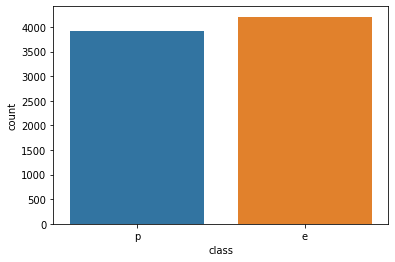

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="class",data=df)
plt.show()

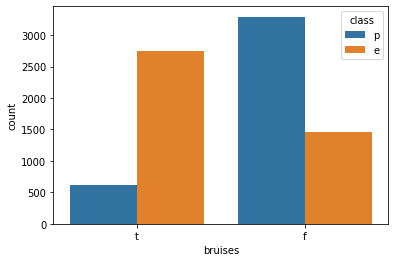

In [61]:
sns.countplot(x="bruises",hue="class",data=df)
plt.show()


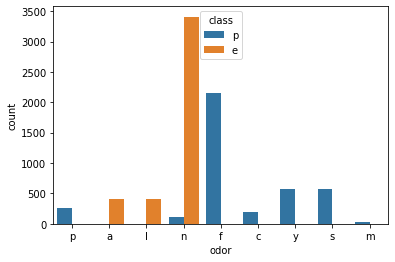

In [62]:
sns.countplot(x="odor",hue="class",data=df)
plt.show()

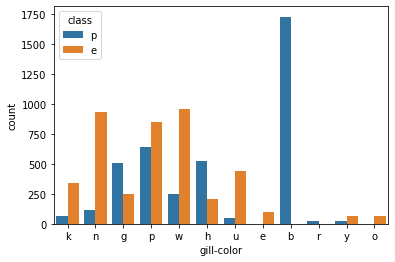

In [63]:
sns.countplot(x="gill-color",hue="class",data=df)
plt.show()

In [64]:
#

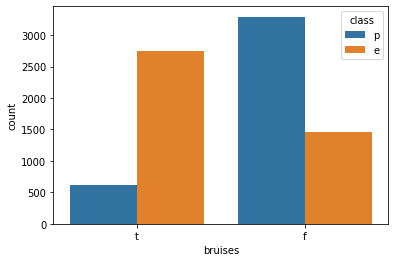

In [65]:
sns.countplot(x="bruises",hue="class",data=df)
plt.show()

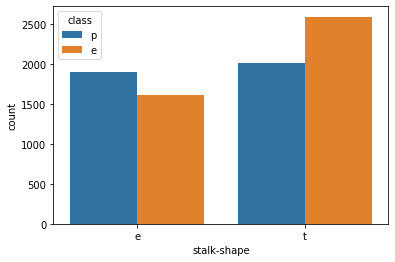

In [66]:
sns.countplot(x="stalk-shape",hue="class",data=df)
plt.show()

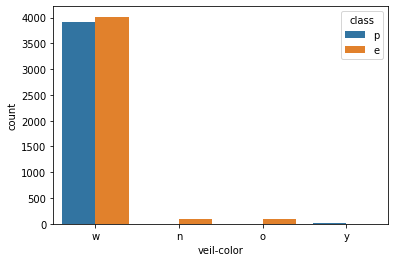

In [67]:
sns.countplot(x="veil-color",hue="class",data=df)
plt.show()

In [68]:
#mushrooms with gill color buff are poisonous(highly)
#edible mushrooms---> odor almond ,anise and no smell
#mushrooms without bruises are in very highly poisonous

#and we get viel color has no impact on class so we should drop it

In [69]:
#i think we need to label encode early here 
#to use descibe()
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [70]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [71]:
# not to forget poisoned is assigned as 1 and edible as 0 in class column

In [72]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [73]:
#sns.heatmap(df.isnull(),annot=True)

In [74]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [90]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()   

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                  -0.165703
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                 -0.164606
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
ring-number                -0.232500
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.199299
dtype: float64

In [ ]:
#to be honest whatever i have tried i cant handle the skewness present
#i have used sqrt too and stats.boxcox we cant use because of negative data

In [76]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.053829,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.208828,-0.411771,0.171961,0.298686,0.207046
cap-shape,0.052951,1.000000,-0.050454,-0.037446,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.093158,-0.025457,-0.073416,0.063413,-0.072213
cap-surface,0.178446,-0.050454,1.000000,-0.033110,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.042222,-0.106407,0.230364,0.021555,0.155021
cap-color,-0.053829,-0.037446,-0.033110,1.000000,-0.042418,-0.329013,0.019338,0.155748,-0.131941,0.067220,...,-0.032423,0.001419,0.007734,NaN,0.013050,-0.020151,0.140041,-0.265246,-0.119891,0.066135
bruises,-0.501530,-0.035374,0.070228,-0.042418,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.066840,0.692973,-0.285008,0.088137,-0.172618
odor,-0.093552,-0.021935,0.045233,-0.329013,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.099445,-0.281387,0.469055,-0.043623,-0.048237
gill-attachment,0.129200,0.078865,-0.034180,0.019338,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.142225,-0.146689,-0.029524,0.165575,-0.075407
gill-spacing,-0.348387,0.013196,-0.282306,0.155748,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.221819,-0.195897,0.047323,-0.529253,-0.020513
gill-size,0.540024,0.054050,0.208100,-0.131941,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.136594,-0.460872,0.622991,0.147682,0.127687
gill-color,-0.530566,-0.006039,-0.161017,0.067220,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.051605,0.629398,-0.416135,-0.034090,-0.232771


In [77]:


df.drop(columns=["veil-color"],inplace=True)


In [78]:
y = df["class"].values   # our column  edible or poison.

df.drop(["class"],axis=1,inplace=True)  # dropping the column from the data

x = df  # our features..

In [79]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,2.000000,1,6,1,0.0,1.0,4,0,...,2,2,7,7,0,1.0,4,2,3,2.236068
1,5,2,3.000000,1,0,1,0.0,0.0,4,0,...,2,2,7,7,0,1.0,4,3,2,1.000000
2,0,2,2.828427,1,3,1,0.0,0.0,5,0,...,2,2,7,7,0,1.0,4,3,2,1.732051
3,5,3,2.828427,1,6,1,0.0,1.0,5,0,...,2,2,7,7,0,1.0,4,2,3,2.236068
4,5,2,1.732051,0,5,1,1.0,0.0,4,1,...,2,2,7,7,0,1.0,0,3,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,2.000000,0,5,0,0.0,0.0,11,0,...,2,2,5,5,0,1.0,4,0,1,1.414214
8120,5,2,2.000000,0,5,0,0.0,0.0,11,0,...,2,2,5,5,0,1.0,4,0,4,1.414214
8121,2,2,2.000000,0,5,0,0.0,0.0,5,0,...,2,2,5,5,0,1.0,4,0,1,1.414214
8122,3,3,2.000000,0,8,1,0.0,1.0,0,1,...,2,1,7,7,0,1.0,0,7,4,1.414214


In [80]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [81]:

y.shape

(8124,)

In [82]:
x.shape

(8124, 21)

In [83]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)
newx=scaler.transform(x)
print(newx)

[[ 1.02971224  0.14012794 -0.04606184 ... -0.67019486 -0.5143892
   1.60966385]
 [ 1.02971224  0.14012794  1.55738893 ... -0.2504706  -1.31310821
   0.10663588]
 [-2.08704716  0.14012794  1.28228027 ... -0.2504706  -1.31310821
   0.99679149]
 ...
 [-0.8403434   0.14012794 -0.04606184 ... -1.50964337 -2.11182722
   0.61030929]
 [-0.21699152  0.95327039 -0.04606184 ...  1.42842641  0.28432981
   0.61030929]
 [ 1.02971224  0.14012794 -0.04606184 ...  0.16925365 -2.11182722
   0.61030929]]


In [84]:
newx.shape

(8124, 21)

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.30,random_state=50)

In [86]:
# SVM
from sklearn.svm import SVR

svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel="poly")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel="rbf")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)



kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.6888486150548414
0.9854612440960258
0.9846982075256213


In [92]:
import sklearn
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.94298605414274
[[1164   55]
 [  84 1135]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1219
           1       0.95      0.93      0.94      1219

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
1.0
[[1

In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(sklearn.tree.DecisionTreeClassifier(),x,y,cv=10,scoring="accuracy").mean()

0.9655560200922206

In [94]:
#i wanted to use other different methods but without handling the skewness i dont think it will work #the model is biased
#Lets save above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(DecisionTreeClassifier(), 'salary.pkl')

['salary.pkl']